## **INSTALLATION**

In [ ]:
# !pip install tensorflow

In [ ]:
# !pip install tensorflow-gpu

## **Mounting Drive and Checking Images**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

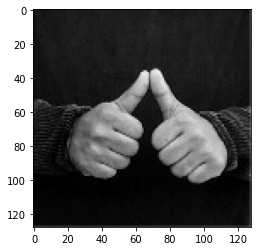

In [ ]:
DATADIR = "/content/drive/MyDrive/Colab Notebooks/ISL/DataSet"
CATEGORIES = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = "gray")
    plt.show()
    break
  break

In [ ]:
def simple_vision(img):
    Picking_Img = cv2.cvtColor(cv2.imread(img),cv2.COLOR_BGR2RGB)
    
    return Picking_Img
def threshold_vision(img):
    Picking_Img = simple_vision(img)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    return threshold_Img
def canny_vision(img):
    Threshold_Img = threshold_vision(img)
    Canny_Img = cv2.Canny(Threshold_Img,10,100)
    
    return Canny_Img
def func(path):    
    frame = cv2.imread(str(path))
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),2)

    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res

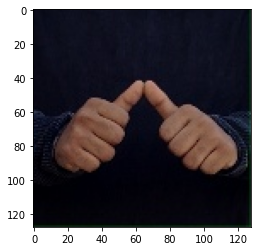

In [ ]:
processed_image = simple_vision(os.path.join(path, '0.jpg'))
plt.imshow(processed_image, cmap = 'gray')

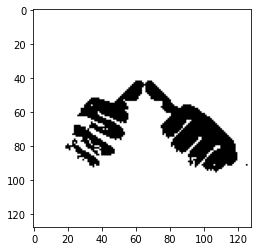

In [ ]:
processed_image = threshold_vision(os.path.join(path, '0.jpg'))
plt.imshow(processed_image,  cmap = 'gray')

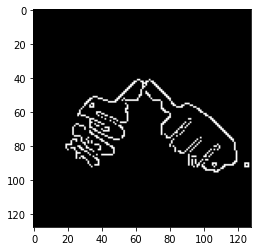

In [ ]:
processed_image = canny_vision(os.path.join(path, '0.jpg'))
plt.imshow(processed_image,  cmap = 'gray')

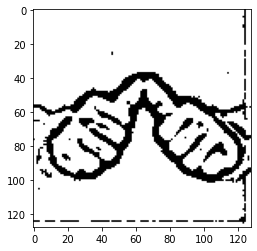

In [ ]:
processed_image = func(os.path.join(path, '0.jpg'))
plt.imshow(processed_image,  cmap = 'gray')

## **Creating split in our data**

In [ ]:
image_generator = ImageDataGenerator(rescale=1/255, 
                                   validation_split=0.2, 
                                   rotation_range=35,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   )    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/ISL/DataSet',
                                                 shuffle=True,
                                                 target_size=(70, 70), 
                                                 color_mode = "grayscale",
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/ISL/DataSet',
                                                 shuffle=True,
                                                 target_size=(70, 70), 
                                                 color_mode = "grayscale",
                                                 subset="validation",
                                                 class_mode='categorical')

Found 24984 images belonging to 26 classes.
Found 6246 images belonging to 26 classes.


In [ ]:
len(train_dataset)

781

In [ ]:
len(validation_dataset)

196

In [ ]:
train_dataset.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

## **Creating Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(24, (3,3), activation = 'relu', input_shape = (70, 70, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding="same"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding="same"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', padding="same"),
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', padding="same"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding="same"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(2532, activation = 'relu'),
                                    tf.keras.layers.Dense(26, activation = 'softmax')     
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 64)        13888     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

## **Training The Model**

*   batch_size = 32
*   train_dataset = 781
*   validation_dataset = 196
*   train_size = 24984
*   validation_seize = 6246

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = Adam(),
              metrics = ["accuracy"])

In [ ]:
batch_size = 32

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(
    train_dataset,
    epochs = 15,
    steps_per_epoch = len(train_dataset) // batch_size,
    validation_data = validation_dataset,
    validation_steps = len(validation_dataset) // batch_size,
    callbacks = callback
)

Epoch 1/15
 1/24 [>.............................] - ETA: 6:44 - loss: 3.2580 - accuracy: 0.0625

KeyboardInterrupt: ignored

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/ISL/savedModel/ISL_CNN_4.h5")

## **Loading and Testing the model**

In [ ]:
from tensorflow.keras.models import load_model
classifier = load_model("/content/drive/MyDrive/Colab Notebooks/ISL/savedModel/ISL_CNN_1.h5")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import pandas as pd

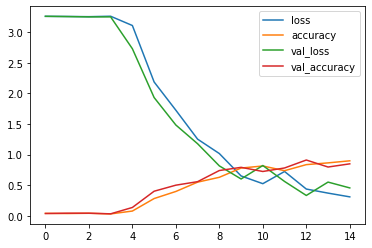

In [ ]:
Grap_Data = pd.DataFrame(history.history)
Grap_Data.plot()

No handles with labels found to put in legend.


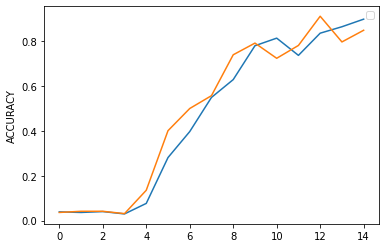

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

No handles with labels found to put in legend.


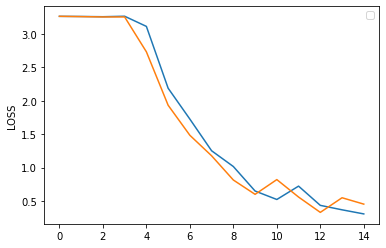

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [ ]:
Y_pred = classifier.predict(validation_dataset, len(validation_dataset) // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_dataset.classes, y_pred))
print('Classification Report')
target_names = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
print(classification_report(validation_dataset.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 7  8 18  5 10  5  4  4  5  0  4  6  7  4 14 12  8 19 11  3 20 38 10 13
   3  2]
 [ 9 11 18  7 15  2  2  4  5  3  3  4  4  3 12  9 11 16  7  6 17 40 14 10
   7  1]
 [17 12 19  7  7  0  5  3  3  5  3  3  3  2 14  8  7  9 14  6 27 42 12 10
   3  1]
 [11  6 18  7 11  3  3  1  6  5  8  8  1  3  9 16 11 22  9  3 20 33  7 13
   4  2]
 [ 7 11 16  7  7  2  0  1  6  5  5  7  5  4 12 10  7 16 10  5 26 46 11  7
   5  2]
 [ 7 11 18  0  9  2  7  2  6  2  6  4  5  5 10 10  7 15 14  3 26 51  6  9
   2  3]
 [14 10 14  2 15  1  2  3  7  2  3  5  5  3 19  9  4 19 12  3 17 47 10 11
   4  1]
 [ 6  9 19  9 10  6  2  2  6  3  4  6  3  5 14 12  9 10 11 10 23 32 14  8
   2  7]
 [ 9 14 14  7  9  1  7  3  2  5  4  6  7  1 11  3 12 20 14  4 19 44 10  8
   2  4]
 [ 7 10 25  6 22  4  6  3  4  2  6  8  5  3 11  6  8 17 10  7 20 27  7 10
   5  1]
 [ 7 10 21  9 12  4  2  2  8  5  5  7  4  5 11  5  9 22  6  3 18 43  9  6
   2  5]
 [ 9  8 15  8 15  4  4  3  8  6  4  0  6  5 13  5 11 16  9  7 14 38 15

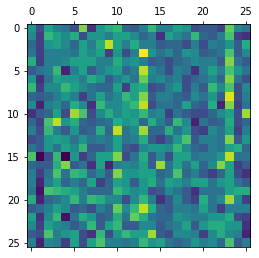

In [ ]:
plt.matshow(confusion_matrix(validation_dataset.classes, y_pred))

In [ ]:
import seaborn as sn
import pandas as pd

In [ ]:
array = confusion_matrix(validation_dataset.classes, y_pred)

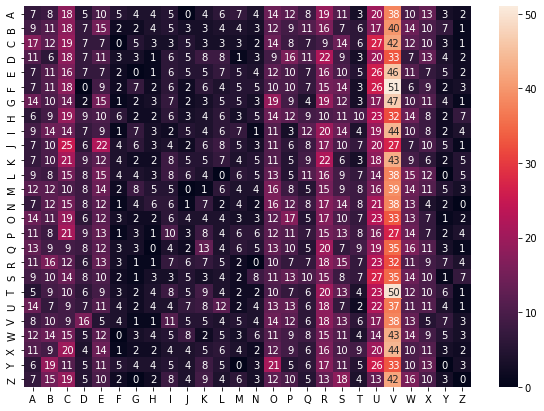

In [ ]:
df_cm = pd.DataFrame(array, index = [i for i in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"],
                  columns = [i for i in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)